<a href="https://colab.research.google.com/github/Ghanashri-m/CMPE255/blob/prashanth-branch/02_imputation_visualization_analysis_encoding_fadd_avprashanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Load the dataset

In [2]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Creating a copy of the dataframe to avoid indices conflicts in future
copy_train = train_data.copy()
copy_test = test_data.copy()
test_dataset = copy_test

In [3]:
copy_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
copy_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
sample_submission= pd.read_csv("sample_submission.csv")

In [6]:
sample_submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


This means that we have to keep the id. Because it will be included in the finals submission and the target variable is the **Salesprice**.

In [7]:
housing_dataset  = pd.concat([copy_train, copy_test], axis=0,sort=False)
housing_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


<AxesSubplot:>

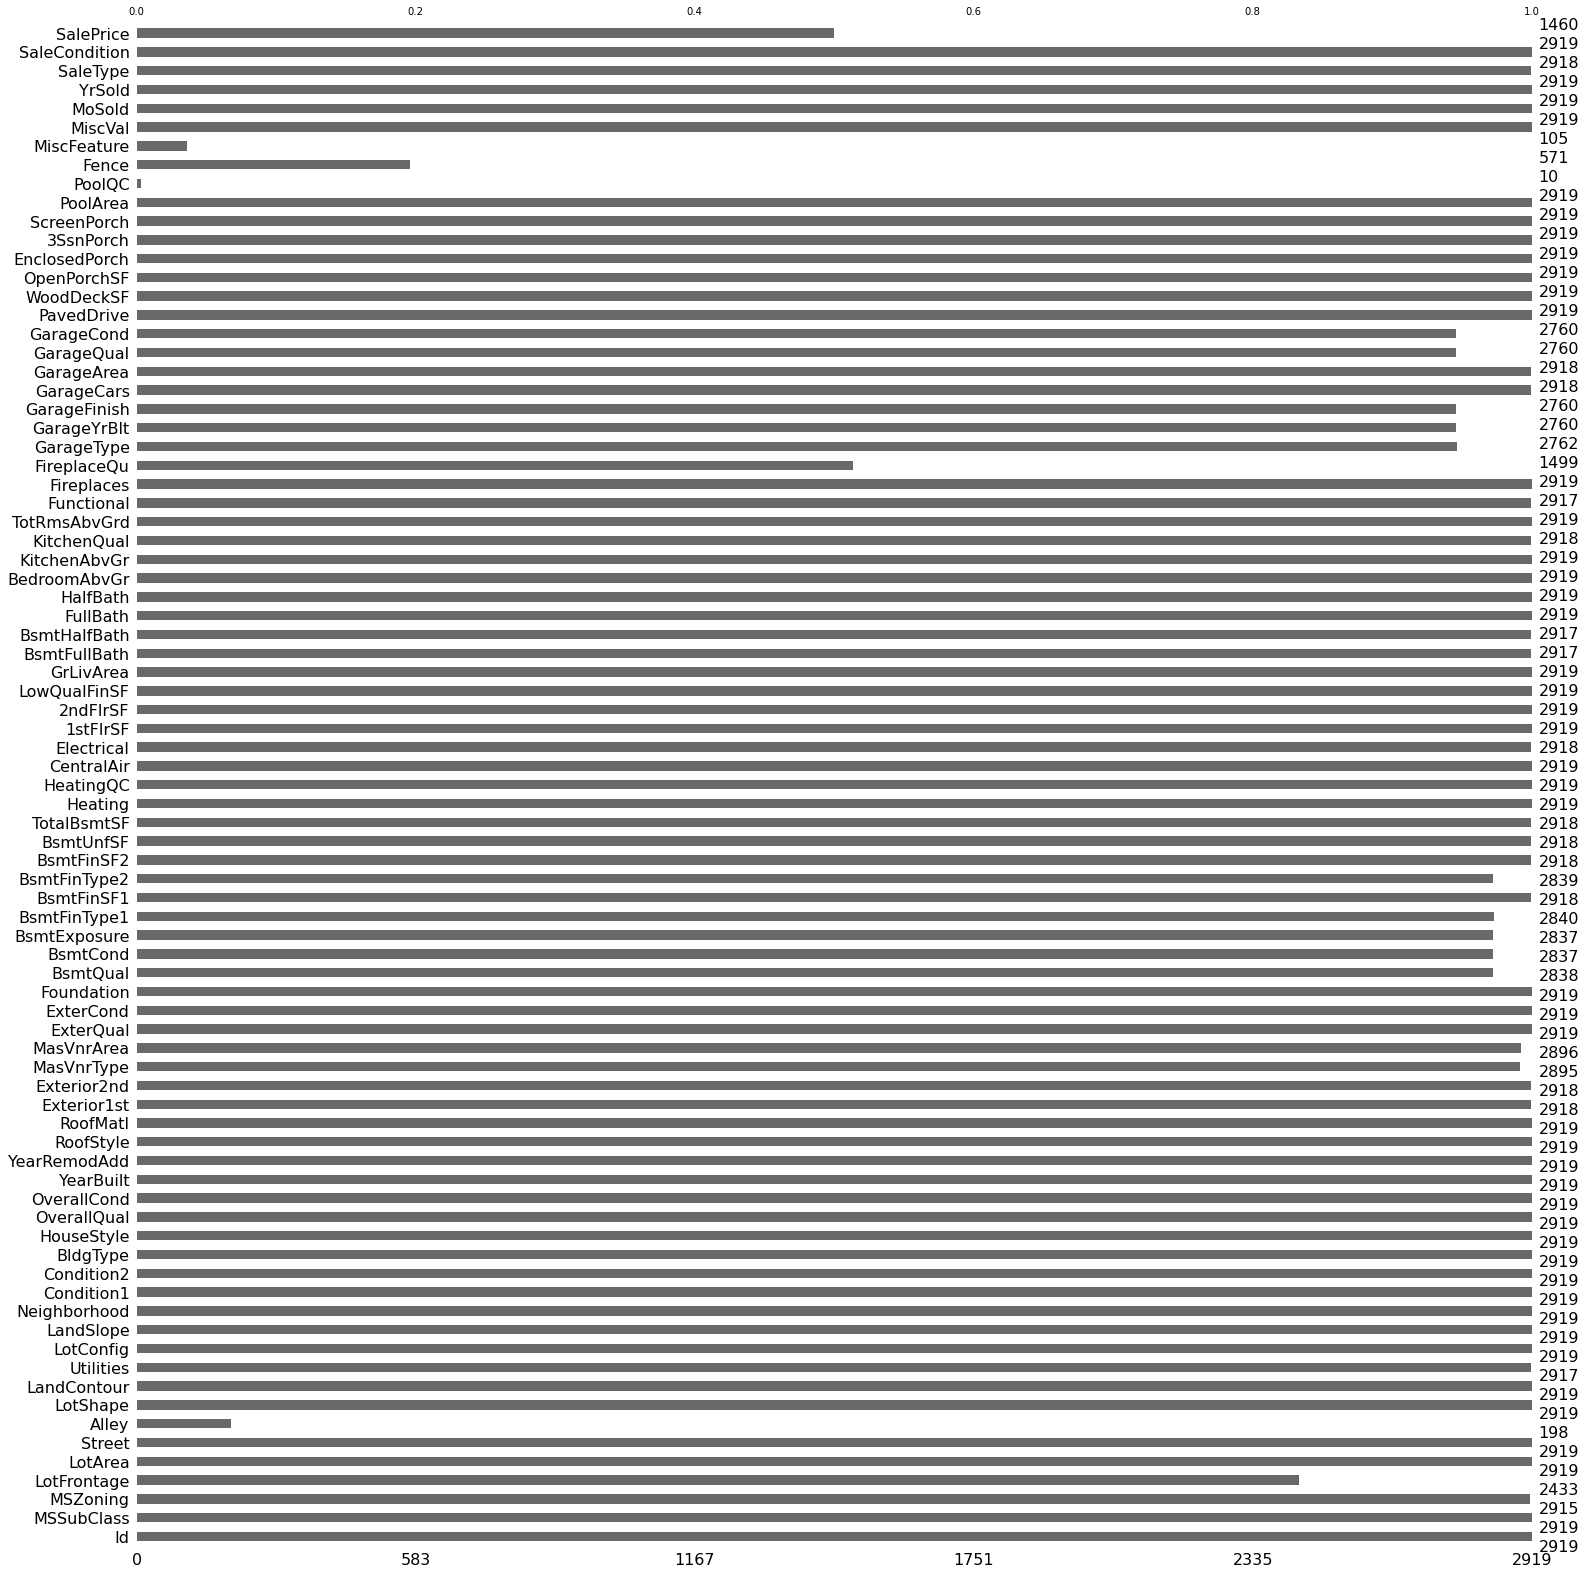

In [8]:
msno.bar(housing_dataset)

The above plot gives us an estimation on the number of null values in each column

<AxesSubplot:>

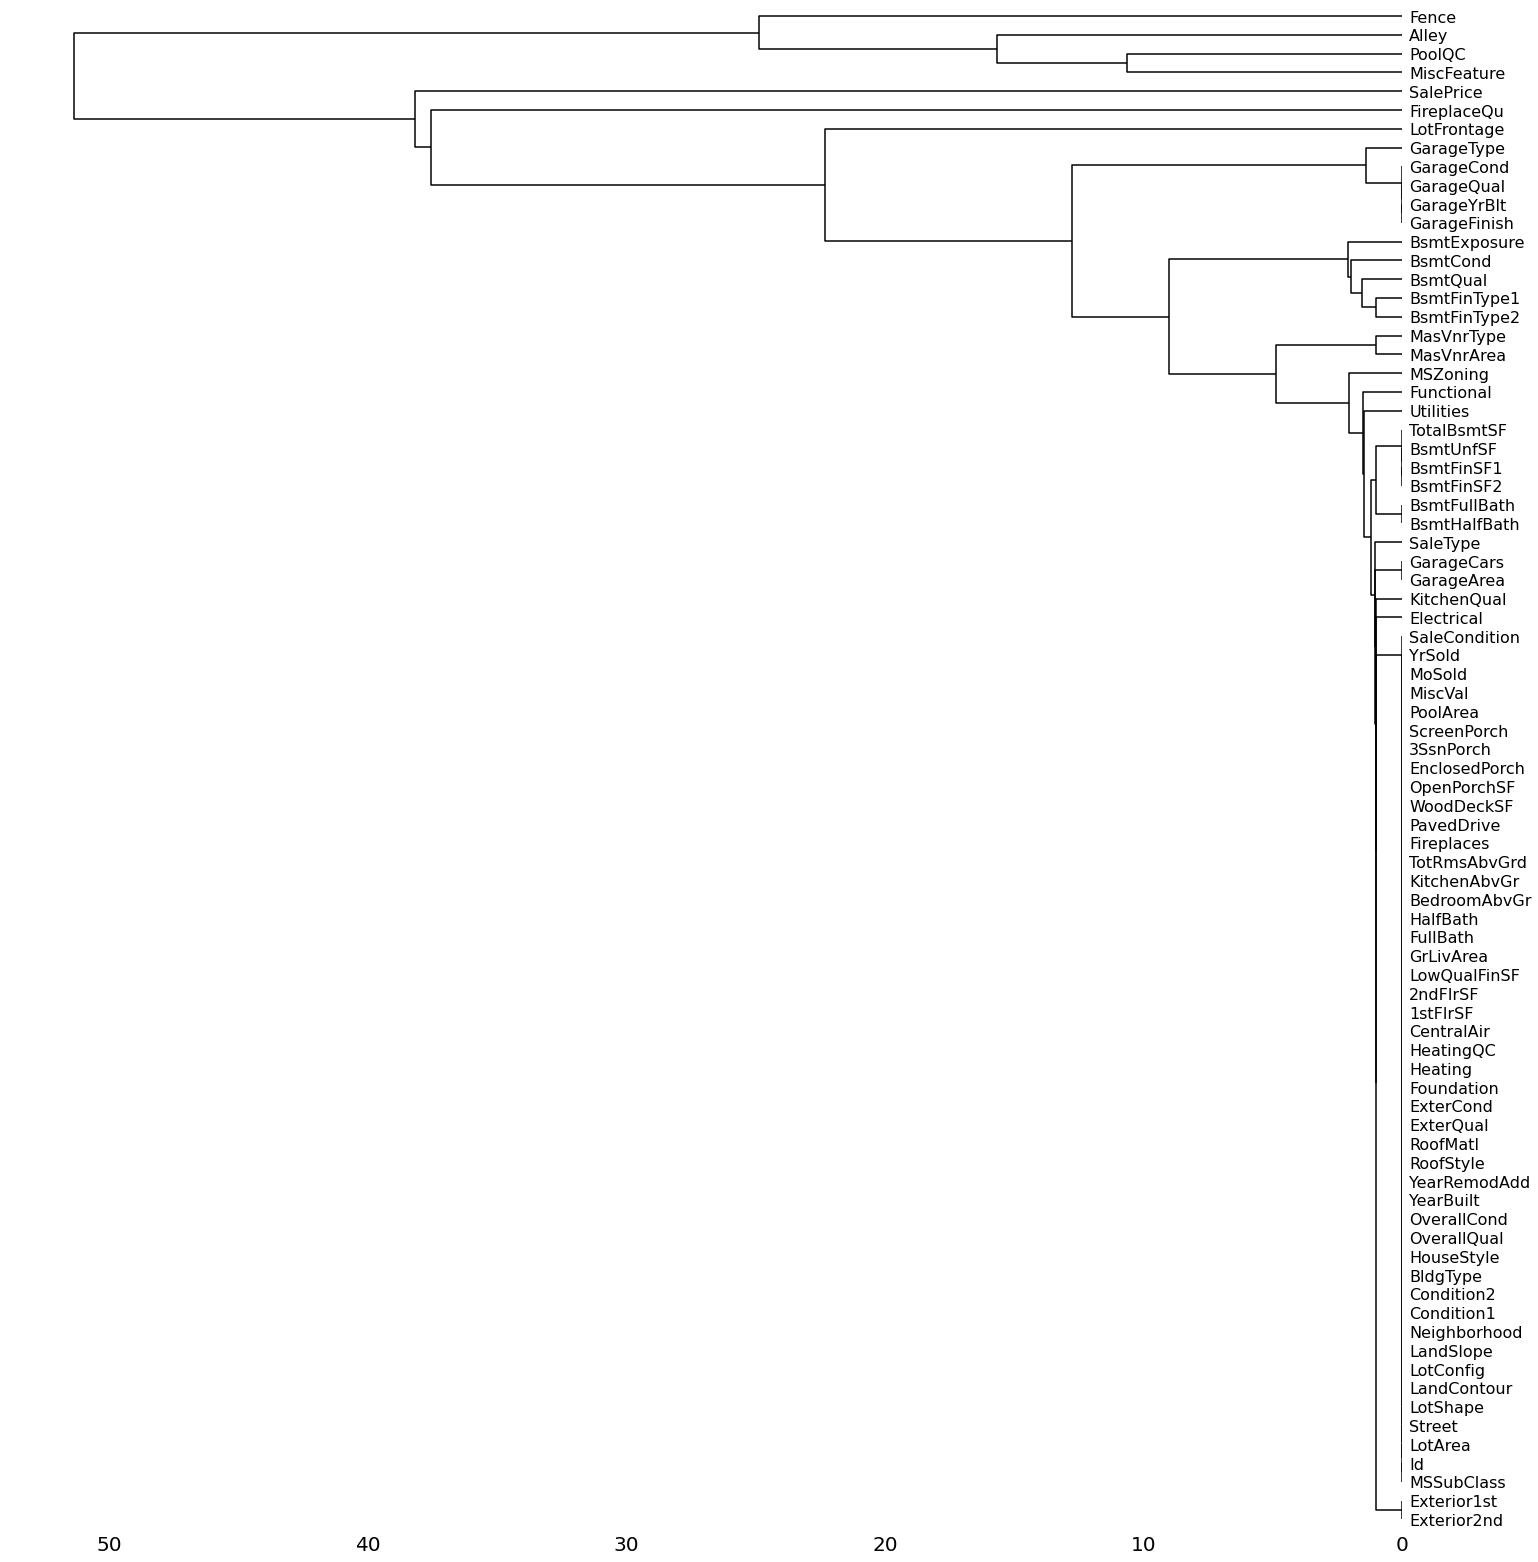

In [9]:
msno.dendrogram(housing_dataset)

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

# Clean Data



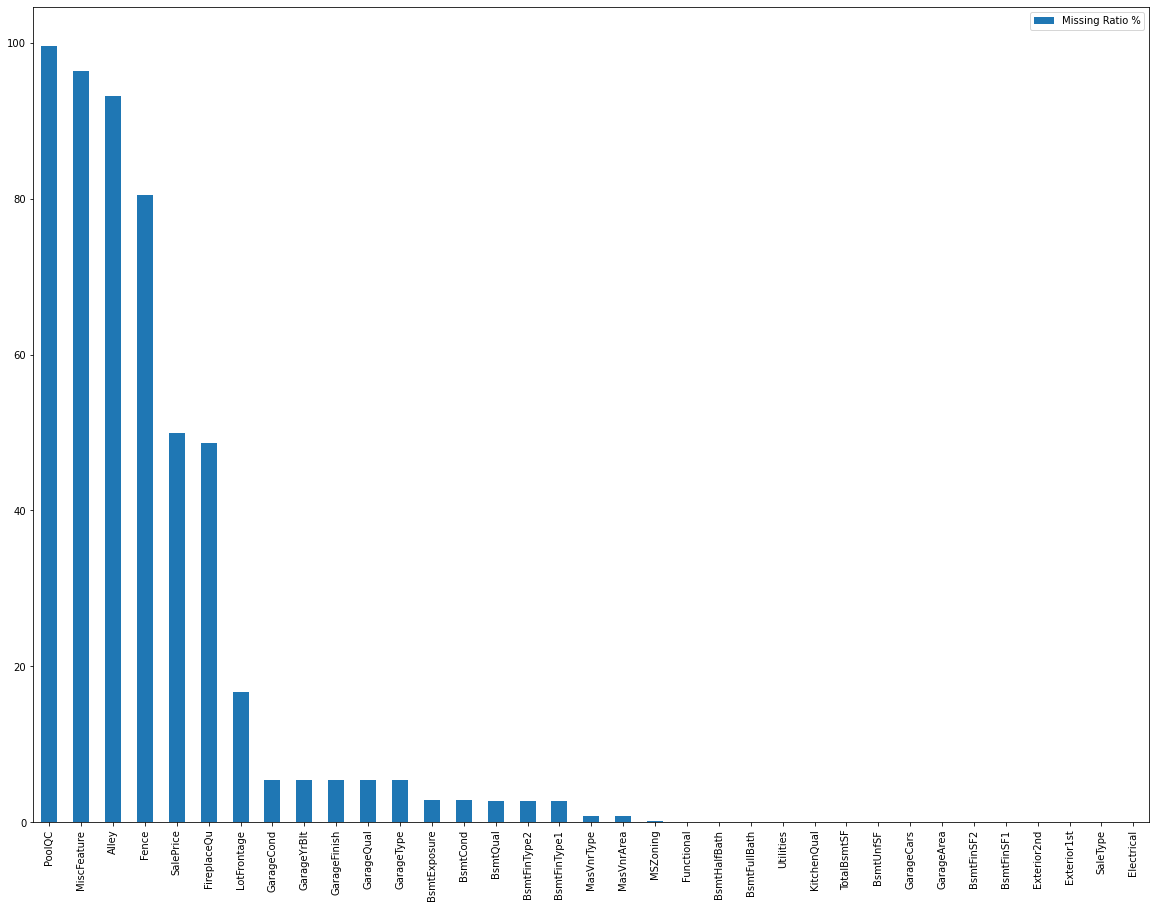

In [10]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        plot_width, plot_height = (20,15)
        plt.rcParams['figure.figsize'] = (plot_width,plot_height)
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.show()
    else:
        print('No NANs found')
plot_nas(housing_dataset)

Percentage of missing values

In [11]:
NAN = [(col, housing_dataset[col].isna().mean()*100) for col in housing_dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

In [12]:
NAN = NAN[NAN.percentage > 80]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506


In [13]:
housing_dataset.shape

(2919, 81)

In [14]:
#From above we can identify that the columns PoolQC, MiscFeature, Alley and Fence contain significant amount of null values and we can get rid of these colums
housing_dataset = housing_dataset.drop(axis = 1, columns="PoolQC")
housing_dataset = housing_dataset.drop(axis = 1, columns="MiscFeature")
housing_dataset = housing_dataset.drop(axis = 1, columns="Alley")
housing_dataset = housing_dataset.drop(axis = 1, columns="Fence")

In [15]:
housing_dataset.shape

(2919, 77)

Reduced shape of the dataframe after removing the columns which has more than 80 percent of null values

# Splitting into numerical and categorical data


In [16]:
object_columns = housing_dataset.select_dtypes(include=['object'])
numeric_columns =housing_dataset.select_dtypes(exclude=['object'])

Splitting the dataframe into the columns which has numerical and categorical features into object_columns and numeric_columns respectively.

In [17]:
len(object_columns.columns)

39

In [18]:
len(numeric_columns.columns)

38

In total it can be seen that there are in total 39 and 38 columns which are categorical and numeric respectively.

In [19]:
object_columns.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [20]:
numeric_columns.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [21]:
null_categorical_counts = object_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


## Imputing Missing Values

In [22]:
print(f"Unique values in MSZoning columns: {housing_dataset['MSZoning'].unique()}, Total unique value count:{len(housing_dataset['MSZoning'].unique())} ")
print(f"Unique values in Utilities columns: {housing_dataset['Utilities'].unique()}, Total unique value count:{len(housing_dataset['Utilities'].unique())} ")
print(f"Unique values in Exterior1st columns: {housing_dataset['Exterior1st'].unique()}, Total unique value count:{len(housing_dataset['Exterior1st'].unique())} ")
print(f"Unique values in Exterior2nd columns: {housing_dataset['Exterior2nd'].unique()}, Total unique value count:{len(housing_dataset['Exterior2nd'].unique())} ")
print(f"Unique values in KitchenQual columns: {housing_dataset['KitchenQual'].unique()}, Total unique value count:{len(housing_dataset['KitchenQual'].unique())} ")
print(f"Unique values in Functional columns: {housing_dataset['Functional'].unique()}, Total unique value count:{len(housing_dataset['Functional'].unique())} ")
print(f"Unique values in SaleType columns: {housing_dataset['SaleType'].unique()}, Total unique value count:{len(housing_dataset['SaleType'].unique())} ")
print(f"Unique values in MasVnrType columns: {housing_dataset['MasVnrType'].unique()}, Total unique value count:{len(housing_dataset['MasVnrType'].unique())} ")
print(f"Unique values in BsmtQual columns: {housing_dataset['BsmtQual'].unique()}, Total unique value count:{len(housing_dataset['BsmtQual'].unique())} ")
print(f"Unique values in BsmtCond columns: {housing_dataset['BsmtCond'].unique()}, Total unique value count:{len(housing_dataset['BsmtCond'].unique())} ")
print(f"Unique values in BsmtExposure columns: {housing_dataset['BsmtExposure'].unique()}, Total unique value count:{len(housing_dataset['BsmtExposure'].unique())} ")
print(f"Unique values in BsmtFinType1 columns: {housing_dataset['BsmtFinType1'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinType1'].unique())} ")
print(f"Unique values in BsmtFinType2 columns: {housing_dataset['BsmtFinType2'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinType2'].unique())} ")
print(f"Unique values in GarageType columns: {housing_dataset['GarageType'].unique()}, Total unique value count:{len(housing_dataset['GarageType'].unique())} ")
print(f"Unique values in GarageFinish columns: {housing_dataset['GarageFinish'].unique()}, Total unique value count:{len(housing_dataset['GarageFinish'].unique())} ")
print(f"Unique values in GarageQual columns: {housing_dataset['GarageQual'].unique()}, Total unique value count:{len(housing_dataset['GarageQual'].unique())} ")
print(f"Unique values in GarageCond columns: {housing_dataset['GarageCond'].unique()}, Total unique value count:{len(housing_dataset['GarageCond'].unique())} ")
print(f"Unique values in Electrical columns: {housing_dataset['Electrical'].unique()}, Total unique value count:{len(housing_dataset['Electrical'].unique())} ")
print(f"Unique values in FireplaceQu columns: {housing_dataset['FireplaceQu'].unique()}, Total unique value count:{len(housing_dataset['FireplaceQu'].unique())} ")

Unique values in MSZoning columns: ['RL' 'RM' 'C (all)' 'FV' 'RH' nan], Total unique value count:6 
Unique values in Utilities columns: ['AllPub' 'NoSeWa' nan], Total unique value count:3 
Unique values in Exterior1st columns: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan], Total unique value count:16 
Unique values in Exterior2nd columns: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' nan], Total unique value count:17 
Unique values in KitchenQual columns: ['Gd' 'TA' 'Ex' 'Fa' nan], Total unique value count:5 
Unique values in Functional columns: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan], Total unique value count:8 
Unique values in SaleType columns: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth' nan], Total unique value count:10 
Unique values in M

In [23]:
none_categorical_columns = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns[none_categorical_columns] = object_columns[none_categorical_columns].fillna('None')

C:\Users\Checkout\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
fewmiss_categorical_columns = ['MasVnrType', 'Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','SaleType', 'KitchenQual','Functional']
object_columns[fewmiss_categorical_columns] = object_columns[fewmiss_categorical_columns].fillna(object_columns.mode().iloc[0])

In [25]:
null_categorical_counts = object_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [26]:
count_unique = object_columns.nunique()
unique_val = pd.DataFrame(count_unique, columns=["Unique_vals"])

In [27]:
unique_val

,Unique_vals
MSZoning,5
Street,2
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25
Condition1,9
Condition2,8


In [28]:
unique_df = pd.read_csv("unique_vals.csv")
unique_df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'unique_vals.csv'

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y="Unique_vals",data=unique_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
unique_df = unique_df.loc[unique_df['Unique_vals']<=9]
unique_df

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y="Unique_vals",data=unique_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
null_numeric_counts = numeric_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_numeric_counts))

LotFrontage: Linear feet of street connected to property

In [ ]:
print(f"Unique values in MasVnrArea columns: {housing_dataset['MasVnrArea'].unique()}, Total unique value count:{len(housing_dataset['MasVnrArea'].unique())} ")
print(f"Unique values in BsmtFinSF1 columns: {housing_dataset['BsmtFinSF1'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinSF1'].unique())} ")
print(f"Unique values in BsmtFinSF2 columns: {housing_dataset['BsmtFinSF2'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinSF2'].unique())} ")
print(f"Unique values in TotalBsmtSF columns: {housing_dataset['TotalBsmtSF'].unique()}, Total unique value count:{len(housing_dataset['TotalBsmtSF'].unique())} ")
print(f"Unique values in BsmtFullBath columns: {housing_dataset['BsmtFullBath'].unique()}, Total unique value count:{len(housing_dataset['BsmtFullBath'].unique())} ")
print(f"Unique values in BsmtHalfBath columns: {housing_dataset['BsmtHalfBath'].unique()}, Total unique value count:{len(housing_dataset['BsmtHalfBath'].unique())} ")
print(f"Unique values in GarageCars columns: {housing_dataset['GarageCars'].unique()}, Total unique value count:{len(housing_dataset['GarageCars'].unique())} ")
print(f"Unique values in GarageArea columns: {housing_dataset['GarageArea'].unique()}, Total unique value count:{len(housing_dataset['GarageArea'].unique())} ")

In [ ]:
numeric_columns['GarageCars'] = numeric_columns['GarageCars'].fillna(0)

In [ ]:
print(numeric_columns["LotFrontage"].mean())

In [ ]:
numeric_columns['LotFrontage'] = numeric_columns['LotFrontage'].fillna(numeric_columns["LotFrontage"].mean())

In [ ]:
print(numeric_columns['GarageYrBlt'])

In [ ]:
print((numeric_columns["YrSold"]-numeric_columns["YearBuilt"]).median())

In [ ]:
numeric_columns['GarageYrBlt'] = numeric_columns['GarageYrBlt'].fillna(numeric_columns['YrSold']-35)

In [ ]:
null_numeric_counts = numeric_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_numeric_counts))

In [ ]:
fewmiss_numeric_columns = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
object_columns[fewmiss_numeric_columns] = numeric_columns[fewmiss_numeric_columns].fillna(numeric_columns.mode().iloc[0])

In [ ]:
object_columns.columns

# Column-wise Variance Plotting

In [ ]:
object_columns['MSZoning'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['MSZoning'].value_counts() 

In [ ]:
object_columns['Street'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Street'].value_counts() 

In [ ]:
object_columns['LotShape'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['LotShape'].value_counts() 

In [ ]:
object_columns['LandContour'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['LandContour'].value_counts() 

In [ ]:
object_columns['Utilities'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Utilities'].value_counts() 

In [ ]:
object_columns['LotConfig'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['LotConfig'].value_counts() 

In [ ]:
object_columns['LandSlope'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['LandSlope'].value_counts() 

In [ ]:
object_columns['Neighborhood'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Neighborhood'].value_counts() 

In [ ]:
object_columns['Condition1'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Condition1'].value_counts() 

In [ ]:
object_columns['Condition2'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Condition2'].value_counts() 

In [ ]:
object_columns['BldgType'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BldgType'].value_counts() 

In [ ]:
object_columns['HouseStyle'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['HouseStyle'].value_counts() 

In [ ]:
object_columns['RoofStyle'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['RoofStyle'].value_counts() 

In [ ]:
object_columns['RoofMatl'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['RoofMatl'].value_counts() 

In [ ]:
object_columns['Exterior1st'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Exterior1st'].value_counts() 

In [ ]:
object_columns['Exterior2nd'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Exterior2nd'].value_counts() 

In [ ]:
object_columns['MasVnrType'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['MasVnrType'].value_counts() 

In [ ]:
object_columns['ExterQual'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['ExterQual'].value_counts() 

In [ ]:
object_columns['ExterCond'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['ExterCond'].value_counts() 

In [ ]:
object_columns['Foundation'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Foundation'].value_counts() 

In [ ]:
object_columns['BsmtQual'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtQual'].value_counts() 

In [ ]:
object_columns['BsmtCond'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtCond'].value_counts() 

In [ ]:
object_columns['BsmtExposure'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtExposure'].value_counts() 

In [ ]:
object_columns['BsmtFinType1'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtFinType1'].value_counts() 

In [ ]:
object_columns['Heating'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Heating'].value_counts() 

In [ ]:
object_columns['HeatingQC'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['HeatingQC'].value_counts() 

In [ ]:
object_columns['CentralAir'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['CentralAir'].value_counts() 

In [ ]:
object_columns['Electrical'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Electrical'].value_counts() 

In [ ]:
object_columns['KitchenQual'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['KitchenQual'].value_counts() 

In [ ]:
object_columns['Functional'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Functional'].value_counts() 

In [ ]:
object_columns['FireplaceQu'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['FireplaceQu'].value_counts() 

In [ ]:
object_columns['GarageType'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageType'].value_counts() 

In [ ]:
object_columns['GarageFinish'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageFinish'].value_counts() 

In [ ]:
object_columns['GarageQual'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageQual'].value_counts() 

In [ ]:
object_columns['GarageCond'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageCond'].value_counts() 

In [ ]:
object_columns['PavedDrive'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['PavedDrive'].value_counts() 

In [ ]:
object_columns['SaleType'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['SaleType'].value_counts() 

In [ ]:
object_columns['SaleCondition'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['SaleCondition'].value_counts() 

In [ ]:
object_columns['BsmtFullBath'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtFullBath'].value_counts() 

In [ ]:
object_columns['BsmtHalfBath'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtHalfBath'].value_counts() 

In [ ]:
object_columns['GarageCars'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageCars'].value_counts() 

After looking at the above variance for all the categorical columns. I have decided to remove RoofMatl,Condition2, Utilities, Street and Heating column becuase the distribution of data is very uneven in those columns.

In [ ]:
object_columns = object_columns.drop(['Utilities','Condition2','Heating','Utilities','RoofMatl','Street'], axis=1)

# Feature Addition

In [ ]:
numeric_columns["Age_of_house"] = numeric_columns['YrSold'] - numeric_columns['YearBuilt']

In [ ]:
numeric_columns['Age_of_house'].describe()

Negative minimum value is identified for age of house, which is not appropriate. Hence we need to look where the negative value is found.

In [ ]:
find_neg = numeric_columns[numeric_columns['Age_of_house'] < 0]

In [ ]:
find_neg

The remodelling date of the house is found to be 2009. So we will change the year sold date to 2009

In [ ]:
numeric_columns.loc[numeric_columns['YrSold']< numeric_columns['YearBuilt'], 'YrSold'] = 2009
numeric_columns['Age_of_house'] = numeric_columns['YrSold'] - numeric_columns['YearBuilt']
numeric_columns['Age_of_house'].describe()

##Identifying the outliers by comparing the features "LotArea" & "GrLivArea" with SalePrice.

In [ ]:
def outlier_visualization(feature):
    plt.figure(figsize=(10, 10))
    plt.scatter(x = housing_dataset[feature], y = housing_dataset['SalePrice'], marker = "*", edgecolors = "Red")
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(feature, fontsize=13)
    plt.show()

outlier_visualization('LotArea')
outlier_visualization('GrLivArea')

In [ ]:

housing_dataset = housing_dataset.drop(housing_dataset[(housing_dataset['LotArea']>100000) & (housing_dataset['SalePrice']<400000)].index)

outlier_visualization('LotArea')

housing_dataset = housing_dataset.drop(housing_dataset[(housing_dataset['GrLivArea']>4000) & (housing_dataset['SalePrice']<300000)].index)
outlier_visualization('GrLivArea')

## Data Correleation

Correlation map to see how features are correlated with SalePrice

In [ ]:
def correlation_matrix():
    corr_matrix = housing_dataset.corr()
    plt.subplots(figsize=(15,12))
    sns.color_palette("bright")
    sns.heatmap(corr_matrix, vmax=0.9, square=True, cmap="Blues")
correlation_matrix()

In [ ]:
housing_dataset = housing_dataset.drop(['SalePrice'],axis=1)
housing_dataset = housing_dataset.set_index('Id') # Settting to id because it is required in the submission format
test_dataset = test_dataset.set_index('Id')

housing_dataset.shape

In [ ]:
housing_dataset.iloc[:1,2]

In [ ]:
transformed_dataset = pd.concat([object_columns, numeric_columns], axis=1,sort=False)

In [ ]:
transformed_dataset

In [ ]:
transformed_dataset.isna().sum()

## Logarithmic Transformation

In [ ]:
from scipy.stats import skew, norm, probplot
y = copy_train['SalePrice']
fig = plt.figure(figsize=(10,10))
sns.distplot(y , fit=norm);

(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot
fig = plt.figure(figsize=(10,10))
res = probplot(y, plot=plt)
plt.show()

# Plotting displot for the Saleprice

In [ ]:
y = np.log( copy_train['SalePrice'])

fig = plt.figure(figsize=(10,10))
sns.distplot(y , fit=norm);
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = probplot(y, plot=plt)
plt.show()

## Transforming some numerical variables that are categorical

In [ ]:
#MSSubClass=The building class
transformed_dataset['MSSubClass'] = transformed_dataset['MSSubClass'].apply(str)

#Changing 'OverallCond' into a categorical variable
transformed_dataset['OverallCond'] = transformed_dataset['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
transformed_dataset['YrSold'] = transformed_dataset['YrSold'].astype(str)
transformed_dataset['MoSold'] = transformed_dataset['MoSold'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# Below we process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(transformed_dataset[c].values)) 
    transformed_dataset[c] = lbl.transform(list(transformed_dataset[c].values))
      
print('Shape all_data: {}'.format(transformed_dataset.shape))

#Getting dummy categorical features

In [ ]:
transformed_dataset = pd.get_dummies(transformed_dataset)
print(transformed_dataset.shape)

ntrain = housing_dataset.shape[0]
ntest = test_dataset.shape[0]
copy_train = transformed_dataset[:ntrain]
copy_test = transformed_dataset[ntrain:]